# PRUEBA UNO

•	Diseñe y desarrolle un modelo y/o script que permita simular el siguiente caso real:
◦	Se tiene los datos de las provincias contigadas por COVID-19, 
los mismo que se encuentran en el siguiente link 
(https://public.flourish.studio/visualisation/1631922/?utm_source=showcase&utm_campaign=visualisation/1631922), 
estos datos estan disponibles en el Avac dentro del apartado Prueba – Practica, con estos datos obtener los siguientes modelos:

▪	Generar un modelo matematico de prediccion para regresion lineal, exponencial, polinomico y logaritmico, 
de los nuevos contactos en la proxima semana (7 dias despues).

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

url = 'Casos covid por provincias.xlsx'

df = pd.read_excel(url)
fecha_inicio="16/3/2020"
provincia_df=df[df['Provincia'] == "Pichincha"]
infectados=provincia_df.iloc[0].loc[fecha_inicio:]
print(len(infectados))

38


In [2]:
x_real= np.zeros(len(infectados))
y_real= np.zeros(len(infectados))
y_real= list(infectados) 
for i in range(len(infectados)):
    x_real[i]=i+1

print(x_real,y_real)


[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38.] [8.0, 8.0, 12.0, 16.0, 35.0, 50.0, 60.0, 65.0, 72.0, 108.0, 121.0, 137.0, 171.0, 188.0, 191.0, 219, 248, 259, 285, 321, 345, 395, 418, 440, 494, 579, 606, 627, 634, 646, 674, 736, 779, 794, 819, 841, 868, 926]


# Modelo Lineal

Coefficients: 
 [26.25396652]
Independent term: 
 -138.39971550497876
1043
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]


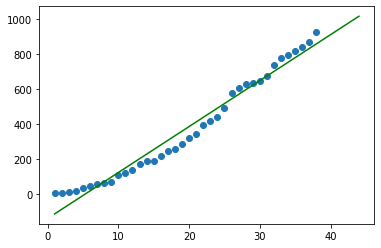

In [3]:

regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(np.array(x_real).reshape(-1, 1) ,y_real)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)

y_prediccion = regr.predict([[45]])
print(int(y_prediccion))
plt.scatter(x_real, y_real)
x_real2 = np.array(range(1, 45))
print(x_real2)
plt.plot(x_real2, regr.predict(x_real2.reshape(-1, 1)), color='green')
plt.show()

# Prediccion para una semana del modelo Lineal

In [4]:
for i in range(8):
    print(regr.predict([[38+i]]))

[859.25101215]
[885.50497866]
[911.75894518]
[938.0129117]
[964.26687821]
[990.52084473]
[1016.77481125]
[1043.02877777]


# Modelo Logistico

(array([-402.91063486,  286.55064918]), array([[ 7613.41735755, -2553.66383765],
       [-2553.66383765,   942.41937939]]))



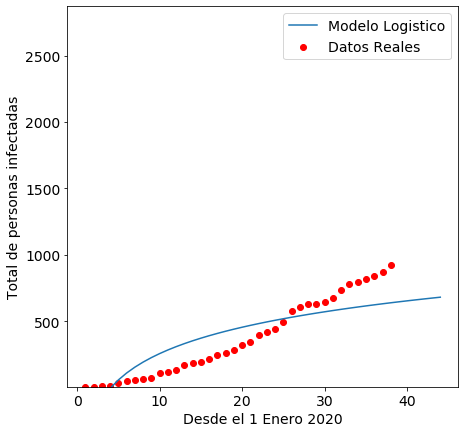

In [5]:
def modelo_logistico(x,a,b):
    return a+b*np.log(x)

exp_fit = curve_fit(modelo_logistico,x_real,y_real) #Extraemos los valores de los paramatros
print(exp_fit)
print()
pred_x = range(1,45) # Predecir 50 dias mas
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
# Real data

plt.scatter(x_real,y_real,label="Datos Reales",color="red")
# Predicted exponential curve
plt.plot(pred_x, [modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x], label="Modelo Logistico" )
plt.legend()
plt.xlabel("Desde el 1 Enero 2020")
plt.ylabel("Total de personas infectadas")
plt.ylim((min(y_real)*0.9,max(y_real)*3.1)) # Definir los limites de Y
plt.show()

# Prediccion para una semana del modelo Logistico

In [6]:
for i in range(8):
    print(modelo_logistico(38+i,exp_fit[0][0],exp_fit[0][1]))

639.4420406615872
646.8853331532031
654.1401674669111
661.2158516346277
668.1210206832515
674.8636999916665
681.451361363285
687.8909727966167


# Modelo Exponencial

(array([ 8.08067866e+01, -6.69668654e-02]), array([[6.91959926e+01, 2.61448565e-02],
       [2.61448565e-02, 1.03502514e-05]]))


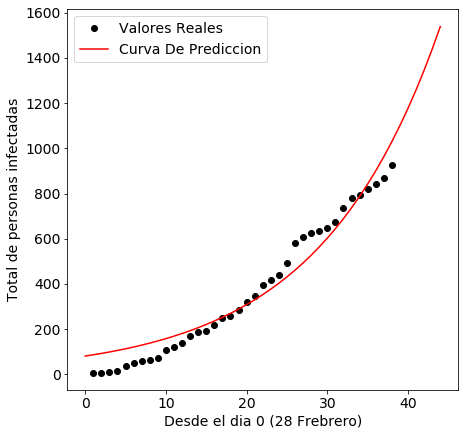

In [7]:
from scipy.optimize import curve_fit
def func(x, a, b):
    return a * np.exp(-b * x-0)
r=curve_fit(func, x_real, y_real)
print(r)
x_prec=np.array(range(0,45))
plt.figure()
plt.plot(x_real, y_real, 'ko', label="Valores Reales")
plt.plot(x_prec,[func(i,r[0][0],r[0][1]) for i in x_prec], 'r-', label="Curva De Prediccion")
plt.legend()
plt.xlabel("Desde el dia 0 (28 Frebrero)")
plt.ylabel("Total de personas infectadas")
plt.show()

# Prediccion para una semana del modelo Exponencial

In [8]:
for i in range(8):
    print(func(38+i,r[0][0],r[0][1]))

1029.4725251951656
1100.7738417435387
1177.0134909011938
1258.5335018218755
1345.6995926149461
1438.9028110435925
1538.5612888578623
1645.1221176328995


# Modelo Polinomial

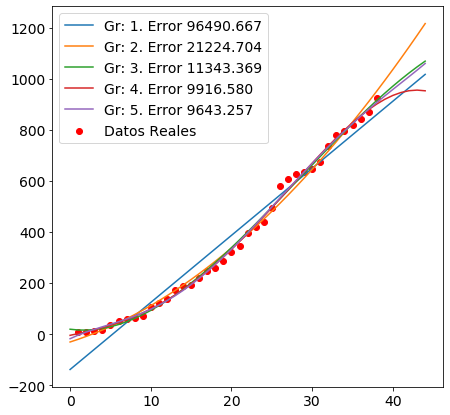

In [11]:
import numpy as np
import matplotlib.pyplot as plt
plt.scatter(x_real,y_real,label="Datos Reales",color="red")

sols = {}
for grado in range(1,6):
  z = np.polyfit(x_real, y_real, grado, full=True)
  sols[grado] = z
xp = np.array(range(0,45))
for grado, sol in sols.items():
  coefs, error, *_ = sol
  p = np.poly1d(coefs)

  plt.plot(xp, p(xp), "-", label="Gr: %s. Error %.3f" % (grado, error) )
plt.legend()

# Prediccion para una semana del modelo polinomial

In [12]:
sols = {}
for grado in range(1,6):
  z = np.polyfit(x_real, y_real, grado, full=True)
  sols[grado] = z
xp = np.array(range(0,45))
for grado, sol in sols.items():
  coefs, error, *_ = sol
  p = np.poly1d(coefs)
  print("funcion")
  for i in range(8):
    print(p(38+i))

funcion
859.2510121457492
885.5049786628736
911.7589451799981
938.0129116971225
964.2668782142468
990.5208447313712
1016.7748112484958
1043.0287777656201
funcion
951.2074898785422
993.2017543859646
1036.0244556297182
1079.6755936098036
1124.1551683262205
1169.4631797789687
1215.5996279680485
1262.5645128934598
funcion
914.7827095882294
943.2290184921764
970.6754933070724
997.0283765546925
1022.1939107568122
1046.0783384352064
1068.587902111651
1089.6288443079206
funcion
900.6620173792837
919.2979248598451
934.4720439658528
945.7912914700847
952.8476178578692
955.2180073270845
952.4644777881591
944.1340808640712
funcion
906.6476837190914
932.5161632220439
957.8581579912824
982.9040376408768
1007.9401441648625
1033.3122523600473
1059.4290302488023
1086.7654995018797


# Modelo SIR
Calcular y generar el modelo SIR, con este dato obtener el betta y gamma, para ello solo emplear los datos de casos confirmados. Para ello se debe tomar la tasa de repoduccion efectiva que se calcula como


0.0027204170098358124
0.001
==== R0 ===
2.7204170098358125
==susceptibles==
49848.31729850733
==Recuperados==
425829.5993544768


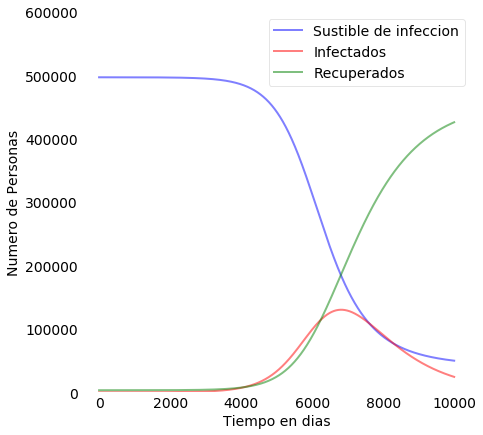

In [13]:
import numpy as np 
from datetime import datetime,timedelta
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd,requests,sys,numpy as np, matplotlib, math, matplotlib.pyplot as plt,scipy
from bs4 import BeautifulSoup
from scipy.integrate import solve_ivp
from scipy.optimize import minimize

from IPython.display import display



def loss(point, data, recovered, s_0, i_0, r_0):
     
    size = len(data)
    beta, gamma = point
    
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2

data = (y_real)
 
# Total de la poblacion
N = 500000
# Numero Inicial de Infectados
I0 = 8
# Numero de Recuperados
R0 = 3279
# Todos los demás, S0, son susceptibles a la infección inicialmente.
S0 = N - I0 - R0



optimal = minimize(loss, [0.001, 0.001], args=(data, y_real, S0, I0, R0), method='L-BFGS-B', bounds=[(0.00000001, 0.4), (0.00000001, 0.4)])

beta, gamma = optimal.x


beta *= 10000
gamma *= 100000 

# Tasa de contacto, beta (nivel de repoductividad del virus) 
# La tasa de recuperación media, gamma,(1/días) Una persona se recupera en 15 dias.
#beta, gamma = 0.589,0.045
# Una cuadrícula de puntos de tiempo (en días)
t = np.linspace(0, 10000,10000)
print("=======")
print(beta)
print(gamma)
print("==== R0 ===")
print(beta/gamma)
print("=======") 
# Las ecuaciones diferenciales del modelo SIR..
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N 
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Vector de condiciones iniciales
y0 = S0, I0, R0
# Integre las ecuaciones SIR en la cuadrícula de tiempo, t. A traves de la funcion odeint()
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T # Obtenicion de resultados

print("==susceptibles==")
print(S[len(S)-1])
print("=======") 
print("==Recuperados==")
print(R[len(R)-1])
print("=======")
#  Trace los datos en tres curvas separadas para S (t), I (t) y R (t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111,  axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Sustible de infeccion')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infectados')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recuperados')
ax.set_xlabel('Tiempo en dias')
ax.set_ylabel('Numero de Personas')
ax.set_ylim(0,N*1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

# Simulacion contagiados
▪Obtener el Re para generar una simulacion de epidimiologica y su grado de difusion, para ello obtener el numero de muertos, recuperados e infectados.

# Valor de Re

In [14]:
print((beta/gamma)*N)

1360208.5049179061


In [15]:
from random import randrange
import pygame

#Parametros de inicio
PROBA_MUERTE = 4  # Probabilidad de que la gente muera COVID
CONTAGION_RATE = (beta/gamma)*N # Factor R0 para la simulacion COVID probabilidad
PROBA_INFECT = CONTAGION_RATE * 10
PROBA_VACU = 0 # Probabilidad de que exista una vacuna, COVID = 0
SIMULACION_SPEED = 25 # Tiempo de un dia en milisegundos
nb_rows = 100 #Numero de filas
nb_cols = 100 #Numero de columnas

global display, myfont, states, states_temp

WHITE = (255, 255, 255)
BLUE = (0, 0, 255)
GREEN = (0, 247, 0)
BLACK = (0, 0, 0)

def get_vecinos(x, y):
    incx = randrange(3)
    incy = randrange(3)
    incx = (incx * 1) - 1
    incy = (incy * 1) - 1
    x2 = x + incx
    y2 = y + incy
    if x2 < 0:
        x2 = 0
    if x2 >= nb_cols:
        x2 = nb_cols - 1
    if y2 < 0:
        y2 = 0
    if y2 >= nb_rows:
        y2 = nb_rows - 1
    return [x2, y2]

def vacunar():
    for x in range(nb_cols):
        for y in range(nb_rows):
            if randrange(99) < PROBA_VACU:
                states[x][y] = 1

def contar_muertes():
    contador = 0
    for x in range(nb_cols):
        for y in range(nb_rows):
            if states[x][y] == -1:
                contador +=  1
    return contador

#Definimos datos de inicio
states = [[0] * nb_cols for i1 in range(nb_rows)]
states_temp = [[0] * nb_cols for i1 in range(nb_rows)]
states_temp = states.copy()
states[5][5] = 10
it = 0 # Iteraciones
total_muerte = 0
vacunar()

pygame.init()
pygame.font.init()
display=pygame.display.set_mode((1500,1000),0,32)
pygame.display.set_caption("Simulacion de Epidemia Covid-19 Ecuador")
font=pygame.font.SysFont('Calibri', 40)
display.fill(WHITE)

while True:
    pygame.time.delay(SIMULACION_SPEED)
    it = it + 1
    if it <= 10000 and it >= 2:
        states_temp = states.copy()
        for x in range(nb_cols):
            for y in range(nb_rows):
                state = states[x][y]
                if state == -1:
                    pass
                if state >= 10:
                    states_temp[x][y] = state + 1
                if state >= 20:
                    if randrange(99) < PROBA_MUERTE:
                        states_temp[x][y] = -1
                    else:
                        states_temp[x][y] = 1
                if state >= 10 and state <= 20:
                    if randrange(99) < PROBA_INFECT:
                        neighbour = get_vecinos(x, y)
                        x2 = neighbour[0]
                        y2 = neighbour[1]
                        neigh_state = states[x2][y2]
                        if neigh_state == 0:
                            states_temp[x2][y2] = 10
        states = states_temp.copy()
        total_muerte = contar_muertes()
        
    pygame.draw.rect(display, WHITE, (250, 30, 260, 50))
    textsurface = font.render("Total muertes: "+ str(total_muerte), True, (255,160,122))
   
    display.blit(textsurface, (250, 30))

    for x in range(nb_cols):
        for y in range(nb_rows):
            if states[x][y] == 0:
                color = BLUE
            if states[x][y] == 1:
                color = GREEN
            if states[x][y] >= 10:
                color = (states[x][y] * 12, 50, 50)
            if states[x][y] == -1:
                color = BLACK
            pygame.draw.circle(display, color, (100 + x * 12 + 1, 100 + y * 12 + 1), 3)
            pygame.draw.rect(display, WHITE, (100 + x * 12 + 3, 100 + y * 12 + 4, 1, 0))

    for event in pygame.event.get():
        if event.type == pygame.KEYDOWN and event.key == pygame.K_ESCAPE:
            pygame.quit()
        if event.type == pygame.KEYDOWN and event.key == pygame.K_SPACE:
            #Reiniciamos valores
            states = [[0] * nb_cols for i1 in range(nb_rows)]
            states_temp = [[0] * nb_cols for i1 in range(nb_rows)]
            states_temp = states.copy()
            states[50][50] = 10
            it = 0
            total_muerte = 0
            vacunar()
    print("====Muertes====")
    print(total_muerte)        
    pygame.display.update()

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html
====Muertes====
0
====Muertes====
0
====Muertes====
0
====Muertes====
0
====Muertes====
0
====Muertes====
0
====Muertes====
0
====Muertes====
0
====Muertes====
0
====Muertes====
0
====Muertes====
0
====Muertes====
0
====Muertes====
0
====Muertes====
0
====Muertes====
0
====Muertes====
0
====Muertes====
0
====Muertes====
1
====Muertes====
1
====Muertes====
2
====Muertes====
3
====Muertes====
5
====Muertes====
6
====Muertes====
8
====Muertes====
9
====Muertes====
11
====Muertes====
14
====Muertes====
14
====Muertes====
18
====Muertes====
20
====Muertes====
21
====Muertes====
23
====Muertes====
27
====Muertes====
27
====Muertes====
29
====Muertes====
29
====Muertes====
31
====Muertes====
35
====Muertes====
37
====Muertes====
40
====Muertes====
42
====Muertes====
45
====Muertes====
49
====Muertes====
53
====Muertes====
54
====Muertes====
56
====Muertes====
58
====Muertes====
63
====Muertes====
66
====Muert

error: video system not initialized

# CONCLUCIONES

▪	Finalmente, contrarestar los modelos matematicos y generar las siguientes conclusiones
•	Cual tiene una mejor prediccion:

       el modelo que mejor se adapta a los casos es el modelo polinomial ya que el polinomio de tercer grado nos una de 1089.6288443079206 ademas que el grafico esta es la que mejor se adapta a los puntos como pódemos ver en la imagen anterior 
                
        
•	Ventajas y desventajas de los modelos:
        Lineal
            VENTAJAS
                
                es muy poco tiempo de implementacion
            
            DESVENTAJAS
            
                la distancia entre la recta y los puntos puede ser muy grande
            
        Logistica
        
            VENTAJAS
                
                nos sirve para predecir el crecimiento de la poblecion y ver como decae
                
            DESVENTAJAS
            
                siempre nos muestra una tasa de decrecimiento la cual no siempre va a suceder
            
        Exponencial
            VENTAJAS
            
                 nos ayuda tener una base cremiento alta sin ninguna restrccion
            
            DESVENTAJAS
            
                la tasa en algun momento tiene que bajar y este modelo no la puede predecir
            
        Polinomial
        
            VENTAJAS
             
                 es la que mejor se adapta al movimiento de los puntos
            
            DESVENTAJAs
            
                  hay que realizar muchas pruebas para dar con la ecuacion que satisfase a los datos reales
            
•El proceso de simulación desarrollado deberá considerar los siguientes aspectos:
◦	Se debe establecer un modelo basado en modelos matematicos.
◦	El programa deberá generar gráficas que indiquen la ecuacion matematica y probabilistica de tendencias, modelo SIR y expancion epidimiologica.

## METRICAS
◦	Deben calcularse las siguientes métricas:
         
        Betta=0.0027204170098358124
        gamma=0.001
        Re=1360208.5049179061
        
▪	Total de infectados dentro de 7 dias (matematico y probabilistico).

            Lineal: 1043.02877777]
            Logistica: 687.8909727966167 
            Exponencial: 1645.1221176328995 
            Polinomial: 1089.6288443079206


▪	Cuantas personas fallecen, recuperan y sustible de la simulacion.

        Fallecidos:389
        Recuperados:425829.5993544768
        suseptible:49848.31729850733

